# Data Manipulation

## Reading the data

In [1]:
import pandas as pd

new_new_df = pd.read_csv('top_100_100_movielens.csv')
gbtest = new_new_df.groupby("userId")

In [2]:
import numpy as np
import json

filename = 'array_movielens.csv'

# Read the array from the CSV file
mat = np.loadtxt(filename, delimiter=',')

## reading genre mapping and user mapping

In [6]:
with open('genre_map_movielens.txt', 'r') as file:
    genre_map = json.load(file)

print(genre_map)

{'Action|Adventure': 0, 'Action|Adventure|Comedy': 1, 'Action|Adventure|Comedy|Crime': 2, 'Action|Adventure|Comedy|Fantasy': 3, 'Action|Adventure|Comedy|Romance|Thriller': 4, 'Action|Adventure|Comedy|Sci-Fi': 5, 'Action|Adventure|Drama': 6, 'Action|Adventure|Drama|Fantasy': 7, 'Action|Adventure|Drama|War': 8, 'Action|Adventure|Fantasy': 9, 'Action|Adventure|Sci-Fi': 10, 'Action|Adventure|Sci-Fi|IMAX': 11, 'Action|Adventure|Sci-Fi|Thriller': 12, 'Action|Adventure|Sci-Fi|Thriller|IMAX': 13, 'Action|Adventure|Thriller': 14, 'Action|Comedy': 15, 'Action|Comedy|Crime|Drama': 16, 'Action|Comedy|Crime|Thriller': 17, 'Action|Comedy|Sci-Fi': 18, 'Action|Crime': 19, 'Action|Crime|Drama': 20, 'Action|Crime|Drama|Thriller': 21, 'Action|Crime|Thriller': 22, 'Action|Drama': 23, 'Action|Drama|Romance': 24, 'Action|Drama|Sci-Fi|Thriller': 25, 'Action|Drama|Thriller': 26, 'Action|Drama|War': 27, 'Action|Horror|Sci-Fi|Thriller': 28, 'Action|Romance|Thriller': 29, 'Action|Sci-Fi': 30, 'Action|Sci-Fi|Thri

In [3]:
with open('user_id_map_movielens.txt', 'r') as file:
    user_id_map = json.load(file)
user_id_map = {(float(key)): value for key, value in user_id_map.items()}
print(user_id_map)

{2025.0: 0, 4796.0: 1, 7705.0: 2, 11109.0: 3, 14320.0: 4, 19924.0: 5, 29647.0: 6, 34504.0: 7, 35453.0: 8, 37046.0: 9, 48470.0: 10, 60950.0: 11, 61614.0: 12, 63783.0: 13, 64180.0: 14, 66462.0: 15, 67625.0: 16, 70346.0: 17, 70539.0: 18, 73145.0: 19, 74769.0: 20, 77609.0: 21, 85836.0: 22, 89524.0: 23, 94843.0: 24, 95569.0: 25, 102042.0: 26, 102235.0: 27, 103438.0: 28, 105104.0: 29, 109040.0: 30, 111908.0: 31, 116632.0: 32, 117490.0: 33, 123100.0: 34, 127004.0: 35, 133016.0: 36, 133398.0: 37, 134596.0: 38, 137652.0: 39, 138332.0: 40, 141955.0: 41, 146942.0: 42, 153081.0: 43, 156633.0: 44, 158002.0: 45, 158194.0: 46, 168963.0: 47, 169482.0: 48, 172357.0: 49, 174876.0: 50, 175927.0: 51, 176323.0: 52, 178517.0: 53, 181291.0: 54, 183233.0: 55, 184512.0: 56, 185756.0: 57, 186859.0: 58, 187986.0: 59, 188066.0: 60, 191028.0: 61, 191063.0: 62, 195628.0: 63, 199011.0: 64, 203009.0: 65, 203626.0: 66, 211520.0: 67, 212343.0: 68, 215651.0: 69, 220000.0: 70, 221882.0: 71, 223078.0: 72, 223606.0: 73, 22

## Using genre wise average ratings of each user instead of SVNS

In [4]:
#function to find average rating
def avg_rating(df):
    temp = [ 0 for i in range(new_new_df['genres'].nunique())]
    df = df.reset_index()
    sum = 0
    for g in df['genres'].unique():
        #print(g)
        rat = df[df['genres'] == g]
        avg = rat["rating"].mean()     
        temp[genre_map[g]]= avg
    return temp   

In [7]:
u_g_avg = pd.DataFrame(gbtest.apply(avg_rating)).reset_index()
u_g_avg

,userId,0
0,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857..."
1,4796.0,"[3.25, 2.5, 3.0, 2.0, 4.0, 2.5, 2.6, 2.5, 3.6,..."
2,7705.0,"[2.6739130434782608, 2.857142857142857, 2.7, 2..."
3,11109.0,"[2.9642857142857144, 2.6666666666666665, 3.375..."
4,14320.0,"[1.2, 1.5, 2.0, 2.0, 1.5, 0, 2.25, 0, 3.166666..."
...,...,...
95,271383.0,"[3.6666666666666665, 3.2, 3.0, 3.25, 3.25, 3.6..."
96,273842.0,"[2.8, 3.5, 3.625, 3.0, 2.5, 3.5714285714285716..."
97,275204.0,"[2.9285714285714284, 3.2, 3.0, 2.875, 2.5, 3.5..."
98,275841.0,"[2.6, 2.2, 2.25, 2.4, 3.0, 2.25, 3.18181818181..."


In [8]:
test_crossjoin1 = u_g_avg
test_crossjoin1['key'] = 1
resultx = pd.merge(test_crossjoin1, test_crossjoin1, on ='key').drop(["key"],axis=1)
resultx

,userId_x,0_x,userId_y,0_y
0,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857..."
1,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",4796.0,"[3.25, 2.5, 3.0, 2.0, 4.0, 2.5, 2.6, 2.5, 3.6,..."
2,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",7705.0,"[2.6739130434782608, 2.857142857142857, 2.7, 2..."
3,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",11109.0,"[2.9642857142857144, 2.6666666666666665, 3.375..."
4,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",14320.0,"[1.2, 1.5, 2.0, 2.0, 1.5, 0, 2.25, 0, 3.166666..."
...,...,...,...,...
9995,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",271383.0,"[3.6666666666666665, 3.2, 3.0, 3.25, 3.25, 3.6..."
9996,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",273842.0,"[2.8, 3.5, 3.625, 3.0, 2.5, 3.5714285714285716..."
9997,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",275204.0,"[2.9285714285714284, 3.2, 3.0, 2.875, 2.5, 3.5..."
9998,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",275841.0,"[2.6, 2.2, 2.25, 2.4, 3.0, 2.25, 3.18181818181..."


### Mapping each pair of users with their average rating list and cosine similarity

In [10]:
def mapping_userid_xandy(row):
    return mat[user_id_map[row['userId_x']],user_id_map[row['userId_y']]]

In [11]:
resultx["cosin"] = resultx.apply(mapping_userid_xandy,axis = 1)
resultx

,userId_x,0_x,userId_y,0_y,cosin
0,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",1.000000
1,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",4796.0,"[3.25, 2.5, 3.0, 2.0, 4.0, 2.5, 2.6, 2.5, 3.6,...",0.428837
2,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",7705.0,"[2.6739130434782608, 2.857142857142857, 2.7, 2...",0.395506
3,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",11109.0,"[2.9642857142857144, 2.6666666666666665, 3.375...",0.330084
4,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 3.1, 3.92857142857...",14320.0,"[1.2, 1.5, 2.0, 2.0, 1.5, 0, 2.25, 0, 3.166666...",0.372854
...,...,...,...,...,...
9995,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",271383.0,"[3.6666666666666665, 3.2, 3.0, 3.25, 3.25, 3.6...",0.432586
9996,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",273842.0,"[2.8, 3.5, 3.625, 3.0, 2.5, 3.5714285714285716...",0.225513
9997,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",275204.0,"[2.9285714285714284, 3.2, 3.0, 2.875, 2.5, 3.5...",0.510325
9998,281790.0,"[2.2, 1.0, 2.3333333333333335, 2.0, 3.0, 2.666...",275841.0,"[2.6, 2.2, 2.25, 2.4, 3.0, 2.25, 3.18181818181...",0.380526


In [12]:
resultx['0_x'][0]

[3.0,
 3.25,
 2.5,
 3.25,
 3.0,
 3.1,
 3.9285714285714284,
 3.125,
 3.7,
 2.933333333333333,
 3.2972972972972974,
 3.3666666666666667,
 3.4705882352941178,
 2.5,
 3.2083333333333335,
 2.1818181818181817,
 3.0,
 3.3333333333333335,
 3.0714285714285716,
 3.6,
 3.3,
 4.0,
 3.775,
 3.375,
 4.5,
 2.75,
 3.0,
 4.222222222222222,
 2.9285714285714284,
 3.25,
 3.4444444444444446,
 3.1470588235294117,
 2.9166666666666665,
 3.6666666666666665,
 3.5555555555555554,
 4.0,
 2.7857142857142856,
 2.8,
 3.4,
 3.357142857142857,
 3.75,
 3.8333333333333335,
 4.25,
 2.5,
 3.0,
 4.0,
 4.4,
 1.9,
 3.0,
 4.416666666666667,
 3.1179245283018866,
 3.4047619047619047,
 4.214285714285714,
 4.333333333333333,
 4.0,
 4.0,
 4.0,
 4.083333333333333,
 3.974747474747475,
 2.5,
 3.8125,
 3.576923076923077,
 2.5,
 4.138888888888889,
 3.5569105691056913,
 2.6666666666666665,
 2.75,
 4.359375,
 3.5357142857142856,
 4.045454545454546,
 4.833333333333333,
 3.4,
 3.8,
 3.35,
 4.283783783783784,
 4.215277777777778,
 4.57142857

In [13]:
import math
def genre_wise_pearsonsimilarity(row):
    temp = [ 0 for i in range(len(resultx['0_x'][0]))]
    for j in range(0,len(row)):
        #temp[j] = (np.corrcoef(row['0_x'][j], row['0_y'][j])[0, 1])
        temp[j] = (row['0_x'][j] + row['0_y'][j])/2
    return temp

In [14]:
result_avg = pd.DataFrame()
result_avg['User1'] = resultx['userId_x']
result_avg['User2'] = resultx['userId_y']

In [15]:
result_avg['genre_based_cosinesimilarity'] = resultx.apply(genre_wise_pearsonsimilarity,axis=1)

In [16]:
result_avg["Cosine_between_user"] = resultx['cosin']
result_avg

,User1,User2,genre_based_cosinesimilarity,Cosine_between_user
0,2025.0,2025.0,"[3.0, 3.25, 2.5, 3.25, 3.0, 0, 0, 0, 0, 0, 0, ...",1.000000
1,2025.0,4796.0,"[3.125, 2.875, 2.75, 2.625, 3.5, 0, 0, 0, 0, 0...",0.428837
2,2025.0,7705.0,"[2.8369565217391304, 3.053571428571429, 2.6, 2...",0.395506
3,2025.0,11109.0,"[2.982142857142857, 2.958333333333333, 2.9375,...",0.330084
4,2025.0,14320.0,"[2.1, 2.375, 2.25, 2.625, 2.25, 0, 0, 0, 0, 0,...",0.372854
...,...,...,...,...
9995,281790.0,271383.0,"[2.9333333333333336, 2.1, 2.666666666666667, 2...",0.432586
9996,281790.0,273842.0,"[2.5, 2.25, 2.979166666666667, 2.5, 2.75, 0, 0...",0.225513
9997,281790.0,275204.0,"[2.564285714285714, 2.1, 2.666666666666667, 2....",0.510325
9998,281790.0,275841.0,"[2.4000000000000004, 1.6, 2.291666666666667, 2...",0.380526


In [17]:
# splitting each element of the list as a new feature

r_test_avg = pd.DataFrame(result_avg['genre_based_cosinesimilarity'])
r_test_avg = pd.DataFrame(r_test_avg.genre_based_cosinesimilarity.tolist(), index= r_test_avg.index)
r_test_avg["Cosine_between_user"] = resultx['cosin']
r_test_avg

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Cosine_between_user
0,3.000000,3.250000,2.500000,3.250000,3.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
1,3.125000,2.875000,2.750000,2.625000,3.500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.428837
2,2.836957,3.053571,2.600000,2.732143,3.250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.395506
3,2.982143,2.958333,2.937500,3.232143,3.500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.330084
4,2.100000,2.375000,2.250000,2.625000,2.250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.372854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.933333,2.100000,2.666667,2.625000,3.125,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.432586
9996,2.500000,2.250000,2.979167,2.500000,2.750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.225513
9997,2.564286,2.100000,2.666667,2.437500,2.750,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.510325
9998,2.400000,1.600000,2.291667,2.200000,3.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.380526


In [18]:
r_test_avg.to_csv("training_data_movielens_baseline.csv")

# Training Regression Models 

In [20]:
train_movielens_base = pd.read_csv("training_data_movielens_baseline.csv")

In [21]:
from pycaret.regression import *
exp_reg101 = setup(data = train_movielens_base, target = 'Cosine_between_user',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Cosine_between_user
2,Target type,Regression
3,Original data shape,"(10000, 102)"
4,Transformed data shape,"(10000, 102)"
5,Transformed train set shape,"(7000, 102)"
6,Transformed test set shape,"(3000, 102)"
7,Numeric features,101
8,Preprocess,True
9,Imputation type,simple


In [22]:
best_movielens = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0453,0.0065,0.0804,0.5291,0.0531,0.1153,3.2960
rf,Random Forest Regressor,0.0520,0.0073,0.0851,0.4716,0.0568,0.1344,4.6050
xgboost,Extreme Gradient Boosting,0.0585,0.0081,0.0900,0.4098,0.0603,0.1510,3.0760
lightgbm,Light Gradient Boosting Machine,0.0620,0.0085,0.0920,0.3825,0.0620,0.1632,2.0550
gbr,Gradient Boosting Regressor,0.0712,0.0102,0.1009,0.2599,0.0690,0.1957,2.4660
dt,Decision Tree Regressor,0.0633,0.0131,0.1144,0.0426,0.0768,0.1587,2.5440
br,Bayesian Ridge,0.0806,0.0134,0.1156,0.0302,0.0784,0.2213,2.4250
omp,Orthogonal Matching Pursuit,0.0806,0.0134,0.1156,0.0301,0.0784,0.2213,2.3940
lar,Least Angle Regression,0.0806,0.0134,0.1156,0.0301,0.0784,0.2213,2.4170
ridge,Ridge Regression,0.0806,0.0134,0.1156,0.0301,0.0784,0.2213,2.3480


## Tuning and plotting the top 5 models

In [23]:
XGBOOST = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0595,0.0078,0.0883,0.3212,0.0604,0.1577
1,0.0611,0.0106,0.1031,0.2755,0.0675,0.1507
2,0.0554,0.0070,0.0834,0.4366,0.0565,0.1430
3,0.0553,0.0074,0.0860,0.4303,0.0570,0.1360
4,0.0584,0.0084,0.0914,0.4201,0.0609,0.1503
5,0.0603,0.0096,0.0982,0.4081,0.0647,0.1549
6,0.0574,0.0077,0.0878,0.4351,0.0591,0.1544
7,0.0591,0.0077,0.0876,0.4720,0.0596,0.1606
8,0.0586,0.0069,0.0832,0.5447,0.0566,0.1549


In [24]:
tuned_XGBOOST, tuner_xgboost = tune_model(XGBOOST, return_tuner=True,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0645,0.0084,0.0917,0.2685,0.0631,0.1718
1,0.0643,0.0104,0.1019,0.2931,0.0671,0.1603
2,0.0615,0.0079,0.0888,0.3603,0.0606,0.1587
3,0.0606,0.0080,0.0896,0.3807,0.0598,0.1500
4,0.0665,0.0095,0.0975,0.3398,0.0658,0.1762
5,0.0669,0.0102,0.1010,0.3746,0.0673,0.1734
6,0.0626,0.0080,0.0895,0.4119,0.0612,0.1713
7,0.0634,0.0083,0.0910,0.4305,0.0621,0.1699
8,0.0665,0.0085,0.0921,0.4419,0.0633,0.1785


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
print(tuner_xgboost)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [26]:
with open('tuner_xgboost_movielens_nosvns.txt', 'w') as file:
    file.write(str(tuner_xgboost))

In [27]:
tuned_XGBOOST

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

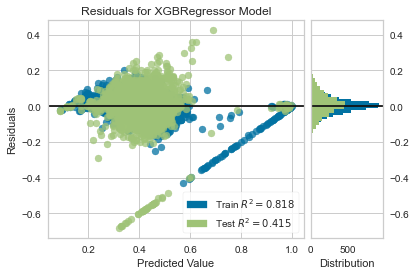

In [28]:
plot_model(tuned_XGBOOST)

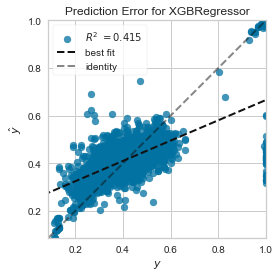

In [29]:
plot_model(tuned_XGBOOST, plot='error')

In [30]:
randomforest = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0545,0.0075,0.0864,0.3515,0.0589,0.1454
1,0.0536,0.0091,0.0952,0.3827,0.0615,0.1316
2,0.0496,0.0063,0.0794,0.4885,0.0535,0.1263
3,0.0501,0.0068,0.0827,0.4723,0.0544,0.1222
4,0.0531,0.0075,0.0869,0.4758,0.0577,0.1374
5,0.0537,0.0084,0.0918,0.4835,0.0602,0.1379
6,0.0503,0.0070,0.0836,0.4874,0.0563,0.1370
7,0.0525,0.0071,0.0842,0.5126,0.0569,0.1415
8,0.0523,0.0063,0.0796,0.5830,0.0541,0.1398


In [31]:
tuned_randomforest, tuner_rf = tune_model(randomforest, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0765,0.0107,0.1036,0.0658,0.0721,0.2146
1,0.0800,0.0139,0.1179,0.0537,0.0790,0.2134
2,0.0736,0.0102,0.1012,0.1703,0.0695,0.2006
3,0.0767,0.0115,0.1071,0.1163,0.0726,0.2024
4,0.0794,0.0122,0.1105,0.1518,0.0754,0.2219
5,0.0819,0.0138,0.1174,0.1545,0.0793,0.2267
6,0.0779,0.0119,0.1089,0.1294,0.0758,0.2329
7,0.0801,0.0123,0.1108,0.1554,0.0758,0.2229
8,0.0810,0.0121,0.1100,0.2044,0.0759,0.2308


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
print(tuner_rf)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\abhij\AppData\Local\Temp\joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Unnamed: '
                                                                          '0',
                                                                          '0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                               

In [33]:
with open('tuner_random_forest_movielens_nosvns.txt', 'w') as file:
    file.write(str(tuner_rf))

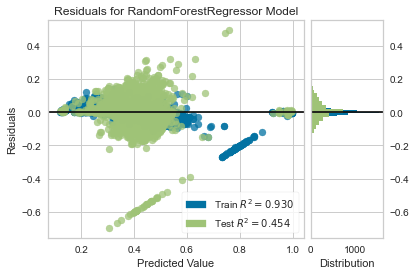

In [34]:
plot_model(tuned_randomforest)

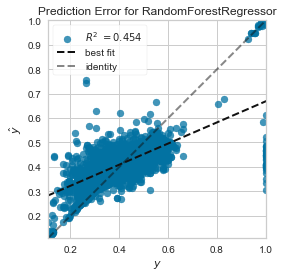

In [35]:
plot_model(tuned_randomforest, plot='error')

In [36]:
LightgradientBoost = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0632,0.0084,0.0919,0.2654,0.0631,0.1704
1,0.0641,0.0106,0.1031,0.2764,0.0675,0.1609
2,0.0588,0.0073,0.0852,0.4109,0.0580,0.1549
3,0.0591,0.0081,0.0899,0.3775,0.0598,0.1484
4,0.0642,0.0090,0.0950,0.3734,0.0640,0.1710
5,0.0640,0.0098,0.0988,0.4013,0.0657,0.1678
6,0.0612,0.0079,0.0891,0.4175,0.0606,0.1674
7,0.0623,0.0084,0.0914,0.4253,0.0623,0.1708
8,0.0623,0.0076,0.0874,0.4973,0.0600,0.1694


In [37]:
tuned_LightgradientBoost, tuner_lgbm = tune_model(LightgradientBoost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0757,0.0105,0.1027,0.0826,0.0715,0.2119
1,0.0780,0.0133,0.1154,0.0935,0.0774,0.2081
2,0.0703,0.0092,0.0960,0.2532,0.0664,0.1932
3,0.0742,0.0107,0.1033,0.1782,0.0702,0.1961
4,0.0757,0.0112,0.1056,0.2255,0.0726,0.2147
5,0.0785,0.0128,0.1132,0.2144,0.0769,0.2187
6,0.0751,0.0109,0.1045,0.1992,0.0731,0.2253
7,0.0764,0.0108,0.1041,0.2547,0.0723,0.2165
8,0.0777,0.0108,0.1040,0.2885,0.0727,0.2244


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [38]:
with open('tuner_light_gradient_boost_movielens_nosvns.txt', 'w') as file:
    file.write(str(tuner_lgbm))

In [39]:
tuned_LightgradientBoost

LGBMRegressor(random_state=123)

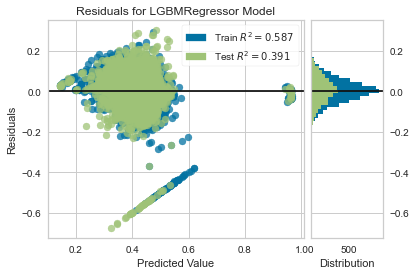

In [40]:
plot_model(tuned_LightgradientBoost)

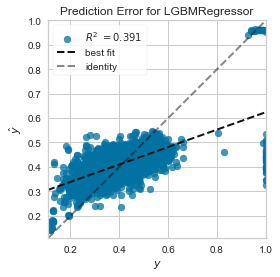

In [41]:
plot_model(tuned_LightgradientBoost, plot='error')

In [42]:
extratrees = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0451,0.0061,0.0778,0.4730,0.0525,0.1188
1,0.0475,0.0091,0.0955,0.3788,0.0613,0.1147
2,0.0439,0.0056,0.0749,0.5447,0.0501,0.1111
3,0.0434,0.0059,0.0767,0.5462,0.0501,0.1059
4,0.0480,0.0069,0.0831,0.5210,0.0548,0.1233
5,0.0470,0.0077,0.0877,0.5284,0.0568,0.1175
6,0.0420,0.0059,0.0767,0.5682,0.0509,0.1115
7,0.0454,0.0062,0.0786,0.5747,0.0526,0.1194
8,0.0457,0.0057,0.0755,0.6252,0.0507,0.1197


In [43]:
tuned_extratrees, tuner_et = tune_model(extratrees, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0795,0.0115,0.1071,0.0033,0.0745,0.2245
1,0.0821,0.0146,0.1210,0.0023,0.0811,0.2194
2,0.0780,0.0123,0.1107,0.0070,0.0752,0.2112
3,0.0802,0.0129,0.1136,0.0057,0.0767,0.2113
4,0.0840,0.0143,0.1196,0.0060,0.0809,0.2330
5,0.0867,0.0162,0.1273,0.0059,0.0854,0.2383
6,0.0818,0.0136,0.1166,0.0022,0.0805,0.2437
7,0.0835,0.0144,0.1202,0.0063,0.0814,0.2306
8,0.0864,0.0151,0.1229,0.0068,0.0834,0.2420


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [44]:
with open('tuner_extra_trees_movielens_nosvns.txt', 'w') as file:
    file.write(str(tuner_et))

In [45]:
tuned_extratrees

ExtraTreesRegressor(n_jobs=-1, random_state=123)

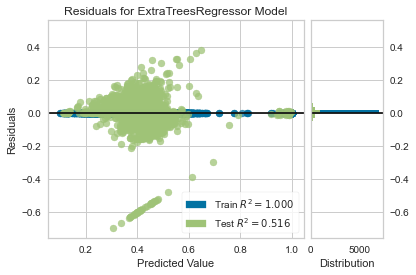

In [46]:
plot_model(tuned_extratrees)

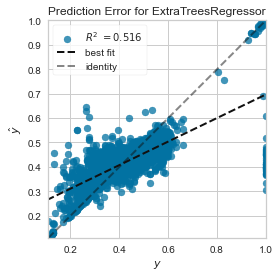

In [47]:
plot_model(tuned_extratrees, plot='error')

In [48]:
decisiontree = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0639,0.0122,0.1106,-0.0637,0.0750,0.1594
1,0.0602,0.0132,0.1147,0.1039,0.0756,0.1470
2,0.0664,0.0131,0.1144,-0.0600,0.0777,0.1673
3,0.0582,0.0117,0.1081,0.0990,0.0724,0.1402
4,0.0640,0.0146,0.1209,-0.0154,0.0802,0.1612
5,0.0609,0.0128,0.1130,0.2163,0.0757,0.1499
6,0.0608,0.0154,0.1242,-0.1311,0.0820,0.1620
7,0.0668,0.0129,0.1136,0.1116,0.0775,0.1762
8,0.0602,0.0116,0.1078,0.2364,0.0729,0.1478


In [49]:
tuned_decisiontree, tuner_dt = tune_model(decisiontree, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0749,0.0113,0.1064,0.0155,0.0732,0.2019
1,0.0737,0.0129,0.1136,0.1210,0.0756,0.1866
2,0.0703,0.0103,0.1014,0.1664,0.0695,0.1856
3,0.0692,0.0101,0.1004,0.2230,0.0676,0.1746
4,0.0687,0.0103,0.1017,0.2814,0.0691,0.1826
5,0.0730,0.0124,0.1112,0.2421,0.0747,0.1927
6,0.0711,0.0110,0.1048,0.1944,0.0719,0.1974
7,0.0735,0.0108,0.1038,0.2589,0.0716,0.2036
8,0.0725,0.0101,0.1004,0.3369,0.0694,0.1970


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
with open('tuner_decision_tree_movielens_nosvns.txt', 'w') as file:
    file.write(str(tuner_dt))

In [51]:
tuned_decisiontree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, max_features=1.0,
                      min_impurity_decrease=0.01, min_samples_leaf=2,
                      min_samples_split=9, random_state=123)

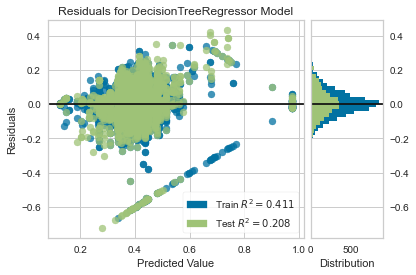

In [52]:
plot_model(tuned_decisiontree)

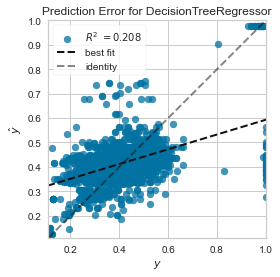

In [53]:
plot_model(tuned_decisiontree, plot='error')

In [54]:
gradientboost = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0712,0.0097,0.0987,0.1521,0.0685,0.1971
1,0.0738,0.0127,0.1125,0.1377,0.0750,0.1941
2,0.0660,0.0083,0.0913,0.3241,0.0630,0.1793
3,0.0689,0.0096,0.0980,0.2597,0.0663,0.1801
4,0.0722,0.0104,0.1022,0.2754,0.0698,0.2008
5,0.0732,0.0116,0.1078,0.2866,0.0729,0.2010
6,0.0711,0.0103,0.1015,0.2444,0.0702,0.2089
7,0.0725,0.0102,0.1008,0.3010,0.0698,0.2048
8,0.0733,0.0098,0.0989,0.3566,0.0688,0.2078


In [55]:
tuned_gradientboost, tuner_gbr = tune_model(gradientboost, return_tuner=True, choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0654,0.0089,0.0941,0.2294,0.0647,0.1764
1,0.0647,0.0105,0.1026,0.2823,0.0674,0.1636
2,0.0598,0.0074,0.0858,0.4033,0.0584,0.1565
3,0.0604,0.0081,0.0898,0.3788,0.0600,0.1530
4,0.0657,0.0092,0.0957,0.3645,0.0646,0.1765
5,0.0645,0.0098,0.0989,0.3995,0.0659,0.1707
6,0.0609,0.0078,0.0883,0.4281,0.0604,0.1709
7,0.0656,0.0088,0.0936,0.3978,0.0640,0.1797
8,0.0645,0.0079,0.0890,0.4789,0.0611,0.1742


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
with open('tuner_gradient_boost_movielens_nosvns.txt', 'w') as file:
    file.write(str(tuner_gbr))

In [57]:
tuned_gradientboost

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, max_features=1.0,
                          min_impurity_decrease=0.02, min_samples_leaf=5,
                          min_samples_split=5, n_estimators=230,
                          random_state=123, subsample=0.85)

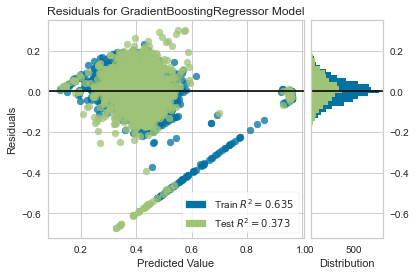

In [58]:
plot_model(tuned_gradientboost)

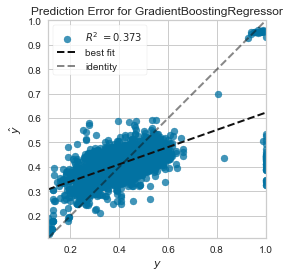

In [59]:
plot_model(tuned_gradientboost, plot='error')